# Proyecto Final Bioestadística

### Grupo 02
* Martín Cortés Albarracín - 202313528
* Hassan Eisa Cavieles Eljadue - 
* Sara Ximena Arias - 202


## Importamos librerías

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
import statsmodels.formula.api as smf
from scipy import stats
from scipy.spatial import distance
from normalizato_utile import *

## Carga de datos

In [45]:
df=pd.read_csv("Datos_G2.csv")
print(df["LocationDesc"].unique())
print(len(df))
columns_interes = ["Data_Value","Age","MMSE","ADL","CholesterolLDL","FunctionalAssessment"]

['West' 'Northeast' 'Midwest' 'Idaho' 'Louisiana' 'Massachusetts'
 'Maryland' 'New Mexico' 'Ohio' 'Oregon' 'South Carolina' 'South'
 'Wisconsin' 'Tennessee' 'New Hampshire' 'Kansas' 'Utah' 'Rhode Island'
 'Michigan' 'Washington' 'Virginia' 'Arizona' 'Mississippi' 'Montana'
 'West Virginia' 'Missouri' 'Vermont' 'Pennsylvania' 'North Carolina'
 'New Jersey' 'Arkansas' 'Hawaii' 'Connecticut' 'Minnesota' 'Texas'
 'Nebraska' 'New York' 'Maine' 'Alaska' 'Georgia' 'Indiana' 'Kentucky'
 'North Dakota' 'Oklahoma' 'Wyoming' 'District of Columbia' 'Iowa'
 'Alabama' 'South Dakota' 'Illinois' 'Colorado' 'Nevada' 'California'
 'Delaware']
2149


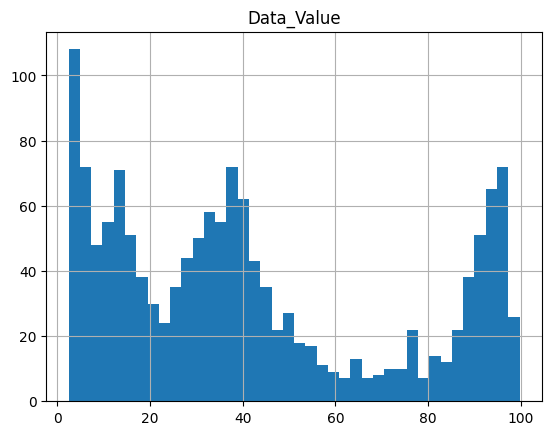

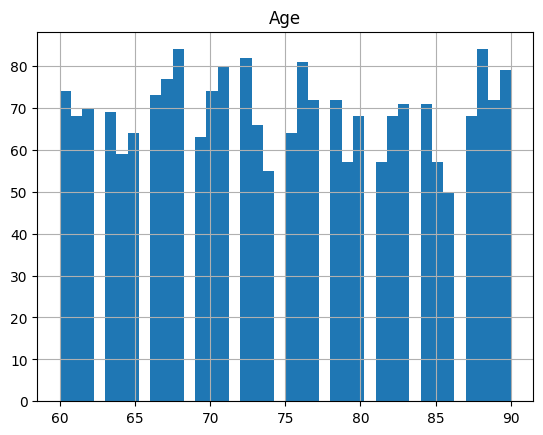

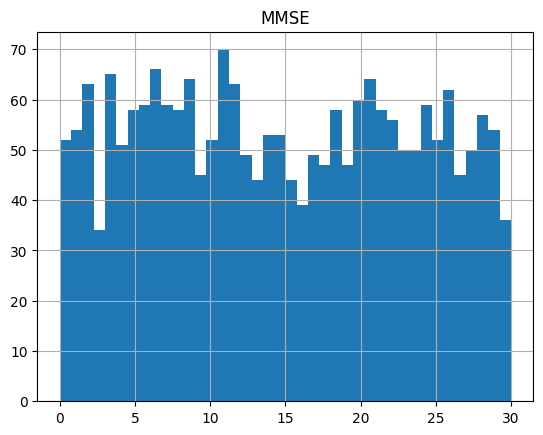

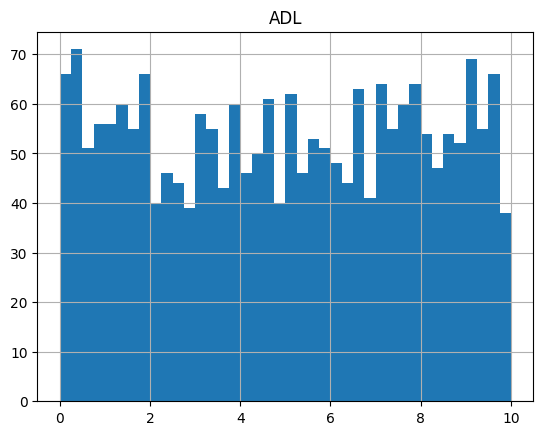

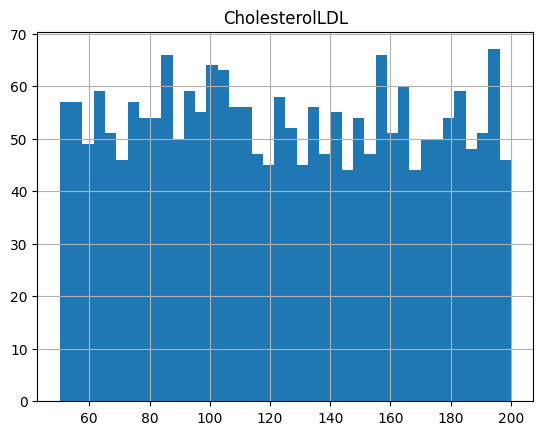

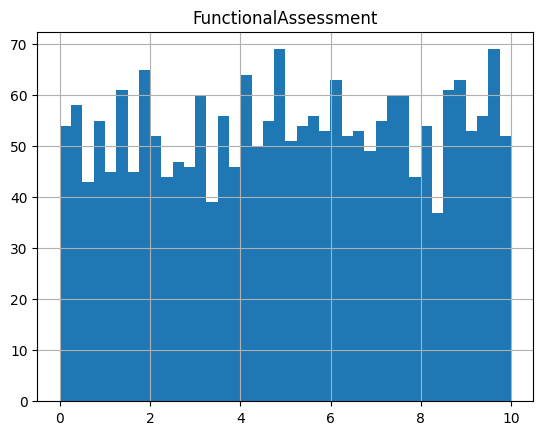

In [53]:
#[df[c].hist(bins=round(np.sqrt(len(df)))) for c in columns_interes]; plt.show()
for col in columns_interes:
  #df[col].hist(bins=round(np.sqrt(len(df)))); plt.title(col); plt.show()
  df[col].hist(bins=40); plt.title(col); plt.show()

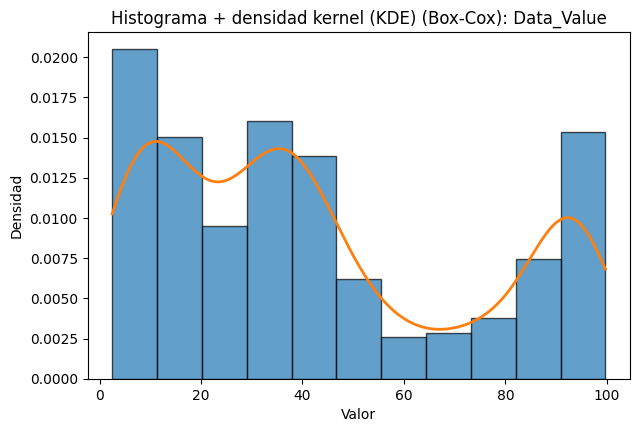

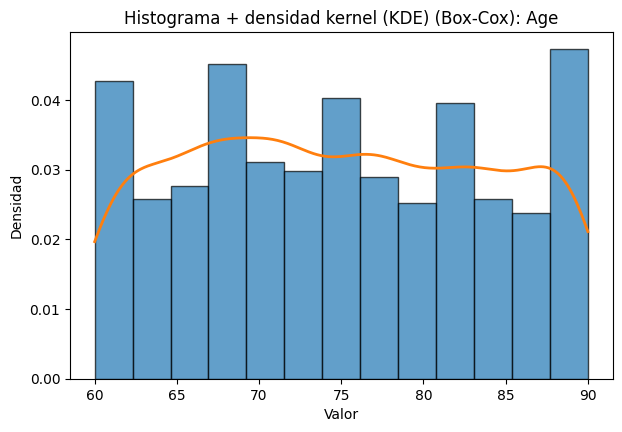

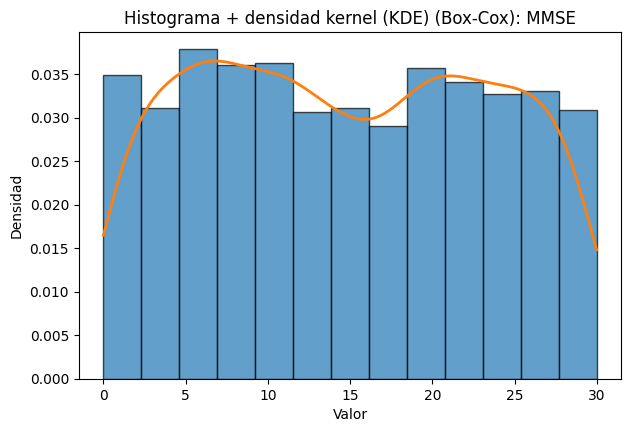

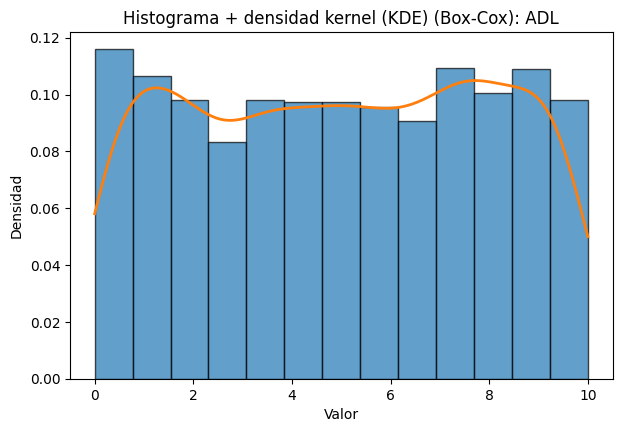

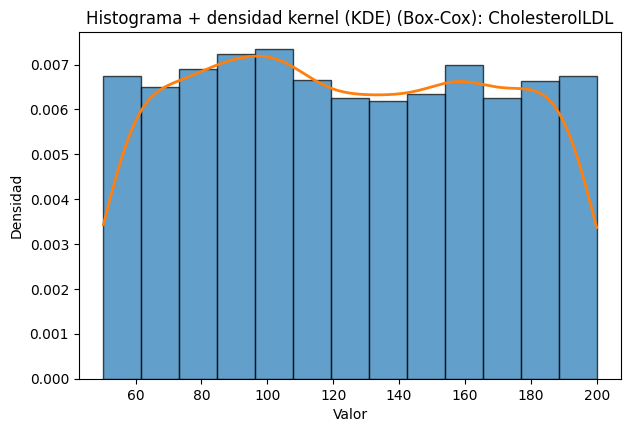

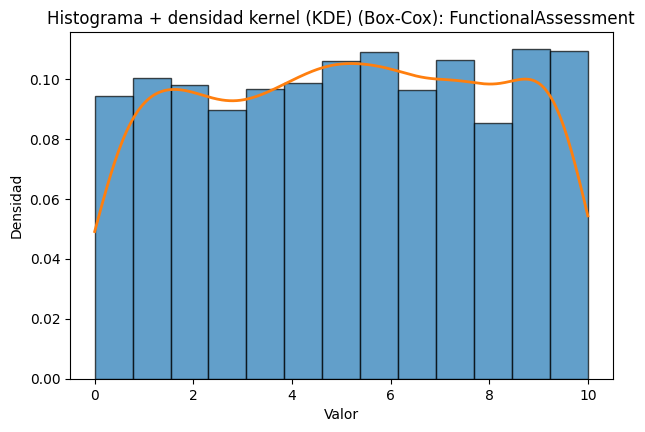

In [54]:
for col in columns_interes:
    columna = df[col].dropna()  # Remove NaNs
    plt.figure(figsize=(7,4.5))
    plt.hist(columna, bins="fd", density=True, alpha=0.7, edgecolor="black")
    kde = stats.gaussian_kde(columna)
    xs = np.linspace(columna.min(), columna.max(), 400)
    plt.plot(xs, kde(xs), linewidth=2)
    plt.title(f"Histograma + densidad kernel (KDE) (Box-Cox): {col}")
    plt.xlabel("Valor"); plt.ylabel("Densidad")
    plt.show()

In [ ]:

df_t, params = transform_df(df, columns=columns_interes, method="boxcox", standardize=True, na_action="ignore")

# 4) (Opcional) Reporte de normalidad
rep = normality_report(df, df_t, columns_interes)
rep.head()

# 5) Graficar una columna antes/después
plot_hist(df["col1"], "Before: col1")
plot_hist(df_t["col1"], "After (Box-Cox + z-score): col1")

ValueError: The `x` argument of `boxcox_normmax` must contain only positive, finite, real numbers.

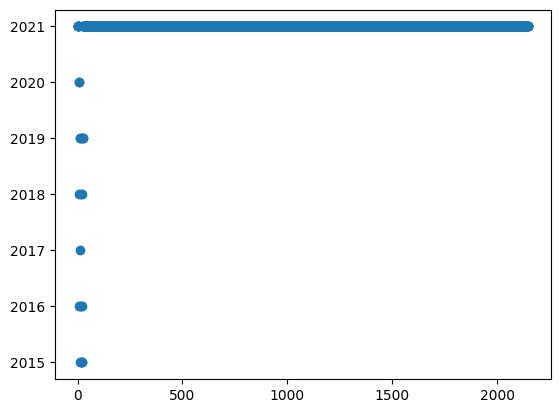

In [29]:
num = df.select_dtypes(include="number")
plt.scatter(num.iloc[:,0], num.iloc[:,1]); plt.show() 

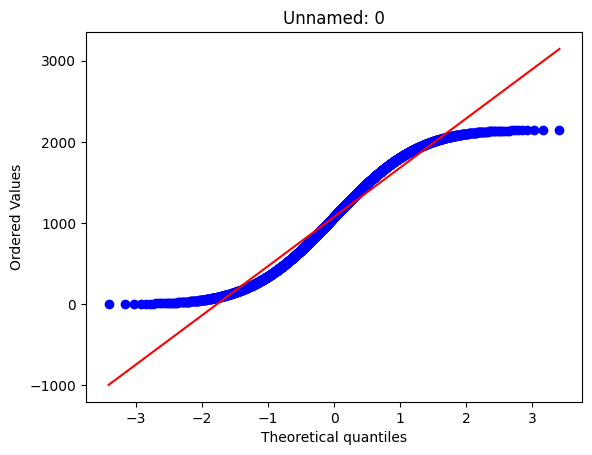

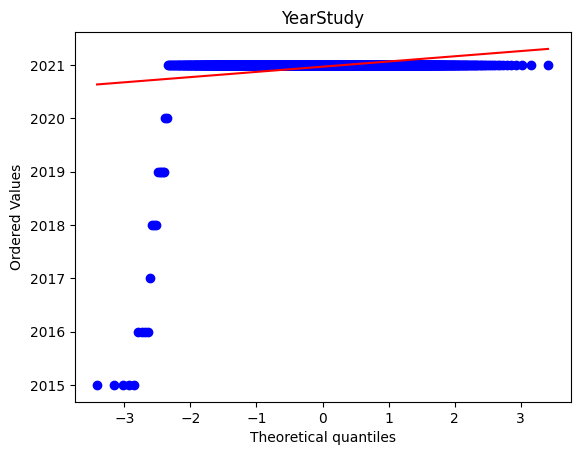

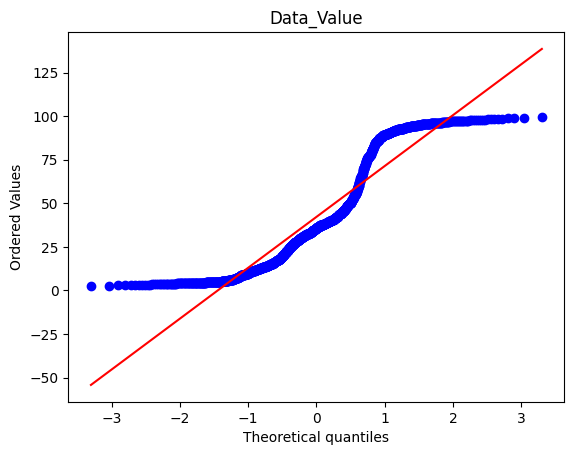

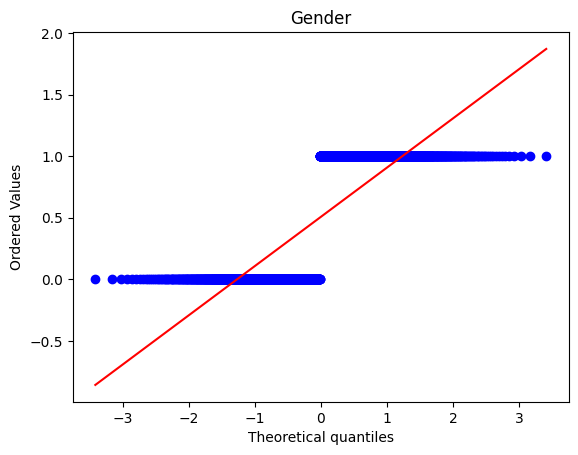

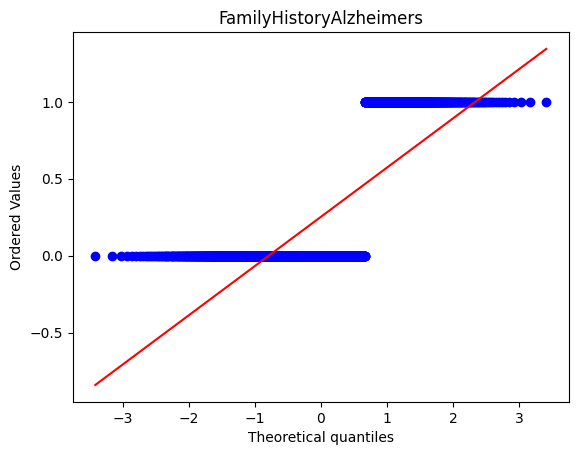

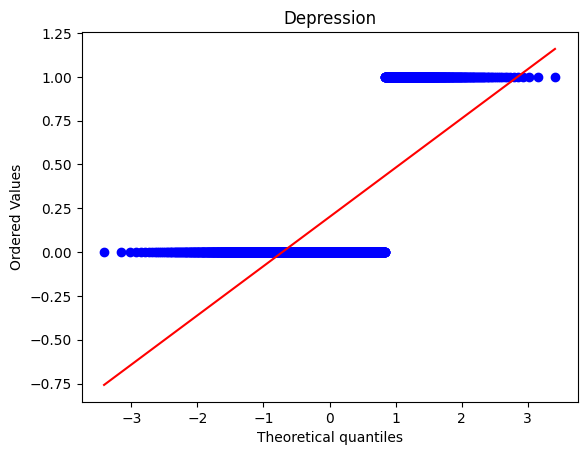

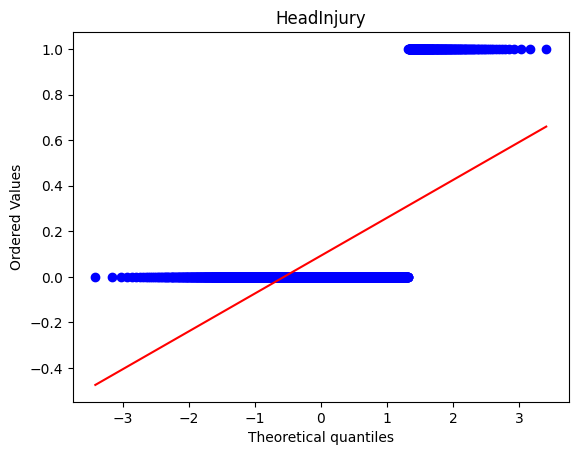

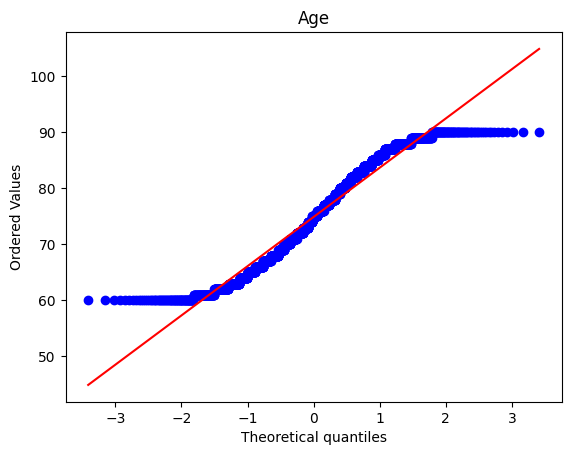

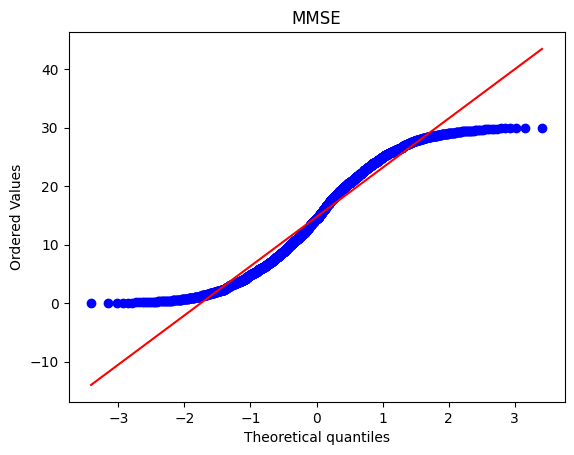

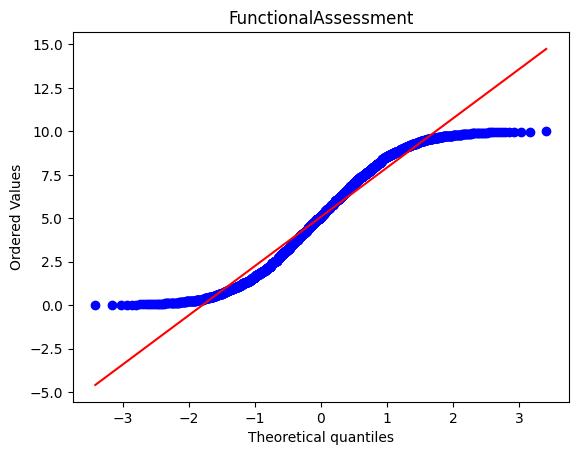

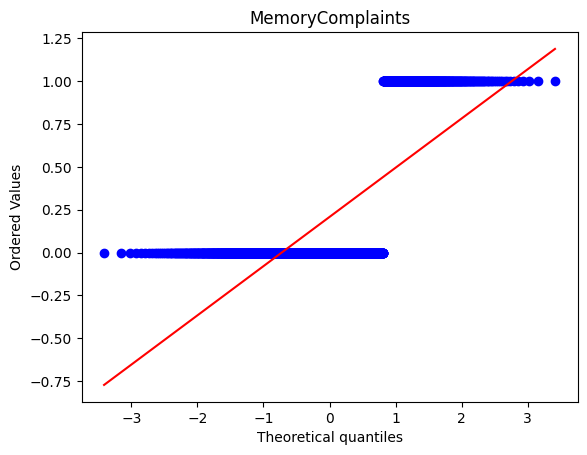

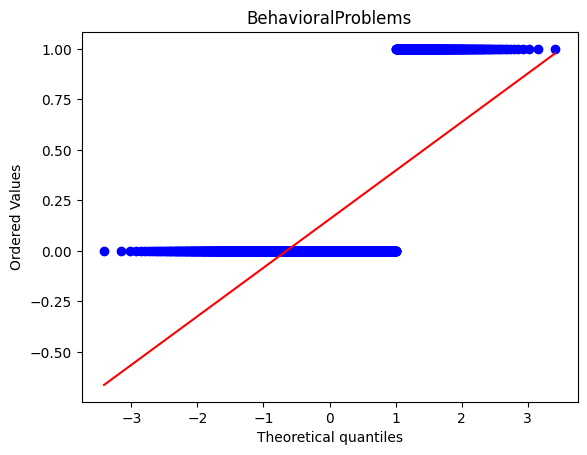

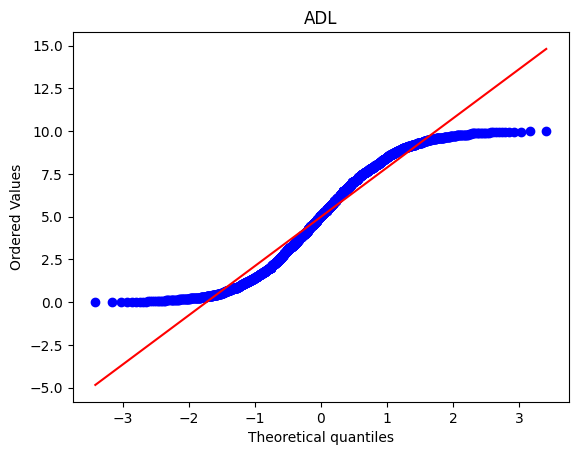

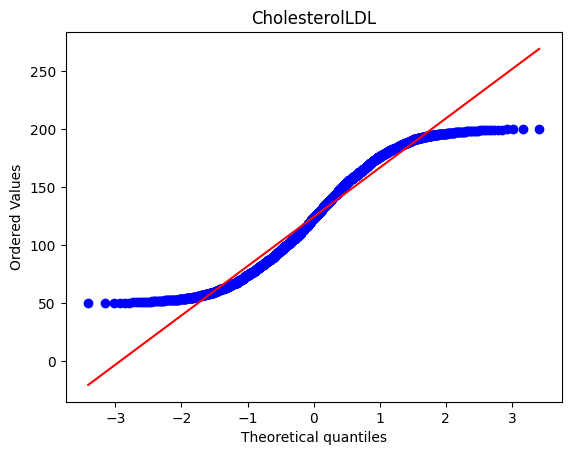

In [31]:
for col in df.select_dtypes(include="number").columns:
  stats.probplot(df[col].dropna(), dist="norm", plot=plt)
  plt.title(col); plt.show()